# STAT226 HW2

Seokjun Choi

*All code blocks are python 3 scripts. All scripts are tested under Python 3.10.5 for 64-bit Windows.*
*Runnable .py script:*
- https://github.com/letsjdosth/SpatialStat/blob/main/hw2p4p5.py
- https://github.com/letsjdosth/SpatialStat/blob/main/hw2p6.py
*Third-party Dependency: numpy, scipy, matplotlib.*

The next block loads dependencies, including the class *PoweredExp* that I made in **Homework 1**.

In [18]:
from cmath import exp as c_exp
from math import exp, sin, tan, cos, pi

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

from spatial_util.cov_functions import PoweredExp

## Problem 4

Following the result that I drove in the note, we can implement $\rho(t) = \sum_{j=1}^K (\lambda_{j1}\phi_{j1}(0) \bar{\phi_{j1}(t)} + \lambda_{j2}\phi_{j2}(0) \bar{\phi_{j2}(t))}$ with the approximation by Xia, G., & Gelfand, A. E. (2006).

The function *KL_approx_for_exp_cov(order,L_cov_domain_bound)* gives $\rho(t)$ at $K =$ *order* and $L = $ *L_cov_domain_bound*.


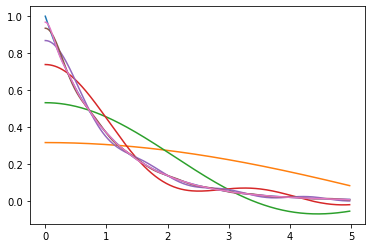

In [19]:
def KL_approx_for_exp_cov(order, L_cov_domain_bound):
    def func_for_wj1(w):
        return tan(w*L_cov_domain_bound) - 1/w
    def func_for_wj2(w):
        return tan(w*L_cov_domain_bound) + w
    
    gap = pi/L_cov_domain_bound
    w1_array = []
    w2_array = []
    for i in range(order):
        root_inst1 = brentq(func_for_wj1, gap*i+0.00001, gap*(i+0.5)-0.000001)
        w1_array.append(root_inst1)
        root_inst2 = brentq(func_for_wj2, gap*(i+0.5)+0.00001, gap*(i+1)-0.00001)
        w2_array.append(root_inst2)

    # print(w1_array)
    # print(w2_array)

    def comp1_eigenval(w1, phi_range):
        return 2*phi_range/(w1**2 + phi_range**2)
    def comp1_eigenfunc(s, w1):
        return cos(w1*s)/(L_cov_domain_bound + sin(2*w1*L_cov_domain_bound)/(2*w1))**0.5

    def comp2_eigenval(w2, phi_range):
        return 2*phi_range/(w2**2 + phi_range**2)
    def comp2_eigenfunc(s, w2):
        return sin(w2*s)/(L_cov_domain_bound - sin(2*w2*L_cov_domain_bound)/(2*w2))**0.5

    s_grid = np.arange(0, L_cov_domain_bound, 0.02)
    comp = 0
    for w1, w2 in zip(w1_array, w2_array):
        comp += (comp1_eigenval(w1, 1)*np.array([comp1_eigenfunc(0, w1) for s in s_grid])*np.array([comp1_eigenfunc(s, w1) for s in s_grid]))
        comp += (comp2_eigenval(w2, 1)*np.array([comp2_eigenfunc(0, w2) for s in s_grid])*np.array([comp2_eigenfunc(s, w2) for s in s_grid]))
    return comp


L_cov_domain_bound = 5
s_grid = np.arange(0, L_cov_domain_bound, 0.02)
exp_inst = PoweredExp(1, 1, 1)
exp_inst.plot_covariance(0, L_cov_domain_bound, 0.02, show=False)
plt.plot(s_grid, KL_approx_for_exp_cov(1, L_cov_domain_bound))
plt.plot(s_grid, KL_approx_for_exp_cov(2, L_cov_domain_bound))
plt.plot(s_grid, KL_approx_for_exp_cov(4, L_cov_domain_bound))
plt.plot(s_grid, KL_approx_for_exp_cov(8, L_cov_domain_bound))
plt.plot(s_grid, KL_approx_for_exp_cov(16, L_cov_domain_bound))
plt.plot(s_grid, KL_approx_for_exp_cov(32, L_cov_domain_bound))
plt.show()


With $K=1,2,4,8,16,32$, I show the $\rho(t)$. 
When viewed from $t=0$, the curves are $K=1,2,4,8,16,32$ in order from bottom to top (orange, green, red, purple, and pink, respectively. Oh... it would be better to make a legend).
The blue curve is the true $\rho$.

(Note that this plot is exactly the same that I attached in my note, at Q4.)

Using more bases, the approximation result gets close to the true $\rho$. Theoretically, we should use infinite bases to approach the true $\rho$.

## Problem 5

Again, following the result that I wrote in the note, we can implement $\rho(t) = \sum_{j=1}^K (\lambda_{j1}\phi_{j1}(0) \bar{\phi_{j1}(t))}$ with the Fourier Basis.

The function *fourier_basis_approx_for_exp_cov(order,L_cov_domain_bound)* gives $\rho(t)$ at $K =$ *order* and $L = $ *L_cov_domain_bound*.


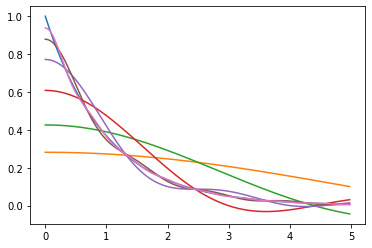

In [20]:
def fourier_basis_approx_for_exp_cov(order, L_cov_domain_bound):
    L = L_cov_domain_bound
    def eigenval(j):
        k = j*pi/(2*L)
        return 2*exp(-L) * (k*sin(k*L)-cos(k*L)+exp(L)) / (1+k**2)

    def eigenfunc(j, s):
        return c_exp(1j*j*pi*s/(2*L))/(2*L)**0.5
    
    s_grid = np.arange(0, L_cov_domain_bound, 0.02)
    
    comp = (0.5*eigenval(0)*np.array([eigenfunc(0, 0) for s in s_grid])*np.conjugate(np.array([eigenfunc(0, s) for s in s_grid])))
    for j in range(1,order+1):
        comp += (eigenval(j)*np.array([eigenfunc(j, 0) for s in s_grid])*np.conjugate(np.array([eigenfunc(j, s) for s in s_grid])))
    return comp

# print(fourier_basis_approx_for_exp_cov(1, L_cov_domain_bound))
exp_inst.plot_covariance(0, L_cov_domain_bound, 0.02, show=False)
plt.plot(s_grid, fourier_basis_approx_for_exp_cov(1, L_cov_domain_bound))
plt.plot(s_grid, fourier_basis_approx_for_exp_cov(2, L_cov_domain_bound))
plt.plot(s_grid, fourier_basis_approx_for_exp_cov(4, L_cov_domain_bound))
plt.plot(s_grid, fourier_basis_approx_for_exp_cov(8, L_cov_domain_bound))
plt.plot(s_grid, fourier_basis_approx_for_exp_cov(16, L_cov_domain_bound))
plt.plot(s_grid, fourier_basis_approx_for_exp_cov(32, L_cov_domain_bound))
plt.show()


With $K=1,2,4,8,16,32$, I show the $\rho(t)$. 
Interestingly, like problem 4, the realized order of curves is the same with respect to $K$: when viewed from $t=0$, the curves are $K=1,2,4,8,16,32$ in order from bottom to top
(orange, green, red, purple, and pink, respectively.)
The blue curve is the true $\rho$.

(Note that this plot is exactly the same that I attached in my note, at Q5.)

Using more bases, the approximation result gets close to the true $\rho$.

## Problem 6

By modifying the above function a little bit, we can get eigenvalues and eigenfunctions from two approximations.
For an empirical one, even if the direction is ordering to use realizations, let me skip generating paths and estimating their covariance matrix.
(The reason is that getting a 'good' covariance-variance matrix is hard work. We may use a naive sample cov-var matrix estimator, but it may not behave well.)
Instead, let me use a (discretized) covariance-variance matrix from exponential covariance function as the empirical one, which is the true value of the estimate of possible simulated samples, to see more clearly whether the approximations are good or not.

In [21]:
# emperical cov
exp_inst = PoweredExp(1,1,1)
n = 100

emp_cov = exp_inst.cov_matrix([np.array([i-n/2]) for i in range(n)])
emp_eig_val, emp_eig_vec = np.linalg.eig(emp_cov)


# KL apprlximation (by Xia's method)
def KL_approx_for_exp_cov_v2(order, L_cov_domain_bound):
    def func_for_wj1(w):
        return tan(w*L_cov_domain_bound) - 1/w
    def func_for_wj2(w):
        return tan(w*L_cov_domain_bound) + w
    
    gap = pi/L_cov_domain_bound
    w1_array = []
    w2_array = []
    for i in range(order):
        root_inst1 = brentq(func_for_wj1, gap*i+0.00001, gap*(i+0.5)-0.000001)
        w1_array.append(root_inst1)
        root_inst2 = brentq(func_for_wj2, gap*(i+0.5)+0.00001, gap*(i+1)-0.00001)
        w2_array.append(root_inst2)

    def comp1_eigenval(w1, phi_range):
        return 2*phi_range/(w1**2 + phi_range**2)
    def comp1_eigenfunc(s, w1):
        return cos(w1*s)/(L_cov_domain_bound + sin(2*w1*L_cov_domain_bound)/(2*w1))**0.5

    def comp2_eigenval(w2, phi_range):
        return 2*phi_range/(w2**2 + phi_range**2)
    def comp2_eigenfunc(s, w2):
        return sin(w2*s)/(L_cov_domain_bound - sin(2*w2*L_cov_domain_bound)/(2*w2))**0.5

    s_grid = np.arange(-L_cov_domain_bound, L_cov_domain_bound, 1)
    eigenval1_array = [comp1_eigenval(w, 1) for w in w1_array]
    eigenfunc1_array = [np.array([comp1_eigenfunc(s, w) for s in s_grid]) for w in w1_array]
    eigenval2_array = [comp2_eigenval(w, 1) for w in w2_array]
    eigenfunc2_array = [np.array([comp2_eigenfunc(s, w) for s in s_grid]) for w in w2_array]
    return eigenval1_array, eigenval2_array, eigenfunc1_array, eigenfunc2_array

# KL apprlximation (using the Fourier basis)
def fourier_basis_approx_for_exp_cov_v2(order, L_cov_domain_bound):
    L = L_cov_domain_bound
    def eigenval(j):
        L = L_cov_domain_bound
        k = j*pi/(2*L_cov_domain_bound)
        return 2*exp(-L) * (k*sin(k*L)-cos(k*L)+exp(L)) / (1+k**2)

    def eigenfunc(j, s):
        return c_exp(1j*j*pi*s/(2*L))/(2*L)**0.5
    
    s_grid = np.arange(-L_cov_domain_bound, L_cov_domain_bound, 1)
    eigenval_array = []
    eigenfunc_array = []

    for j in range(1,order+1):
        eigenval_array.append(eigenval(j))
        eigenfunc_array.append(np.array([eigenfunc(j, s) for s in s_grid]))
    return eigenval_array, eigenfunc_array

The eigenvalues were sorted by their size.
The first five largest eigenvalues from each case are shown below.

In [22]:
print("emp:", emp_eig_val[0:5])
KL_eig_val1, KL_eig_val2, KL_eig_func1, KL_eig_func2 = KL_approx_for_exp_cov_v2(5, 50)
# print(KL_eig_val1[0:3], KL_eig_val2[0:3])
print("KL:", sorted(KL_eig_val1[0:5] + KL_eig_val2[0:5], reverse=True)[0:5])
fourier_eig_val, fourier_eig_func = fourier_basis_approx_for_exp_cov_v2(5, 50)
print("FB:",fourier_eig_val[0:5])

emp: [2.16207128 2.15644595 2.14714012 2.13425635 2.1179343 ]
KL: [1.9981045035167888, 1.9924392309602663, 1.983067246667947, 1.9700917332818388, 1.9536532070497845]
FB: [1.99802802538072, 1.992135364814345, 1.9823911254412976, 1.9689082471969974, 1.951840271661466]


The empirical case's eigenvalues are different a little bit from the others. I'm not sure the reason exactly, but my one hypothesis is that it is a result from discretization.

The next plot shows the first eigenvector (of the empirical case) and the first eigenfunctions(of Xia's and Fourier basis, at corresponding lags to the empirical case)
that correspond to **the first** largest eigenvalues for three cases, respectively.

By color,
- Blue: empirical eigenvector
- Orange: Xia's eigenfunction
- Green: Fourier basis

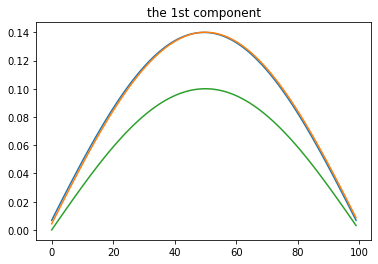

In [23]:
plt.plot(range(100), emp_eig_vec[:,0])
plt.plot(range(100), KL_eig_func1[0])
plt.plot(range(100), fourier_eig_func[0])
plt.title("the 1st component")
plt.show()

All look similar, even if the Fourier basis's amplitude is smaller. (In my guess, this is because Fourier basis has one more 'constant' term, at frequency 0.)

Next, the curves in the next plot are from the eigenvector and the eigenfunctions corresponding to **the second** eigenvalues.

Again, by color,
- Blue: empirical eigenvector
- Orange: Xia's eigenfunction
- Green: Fourier basis

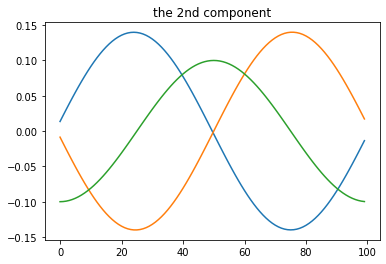

In [24]:
plt.plot(range(100), emp_eig_vec[:,1])
plt.plot(range(100), KL_eig_func2[0])
plt.plot(range(100), fourier_eig_func[1])
plt.title("the 2nd component")
plt.show()

Interestingly, the phase of the second components are different. (why? I didn't expect this result...)
But their periods(frequencies) seem similar.

One more, the curves in the following plot are from the eigenvector and the eigenfunctions corresponding to **the third** eigenvalues.

By color,
- Blue: empirical eigenvector
- Orange: Xia's eigenfunction
- Green: Fourier basis

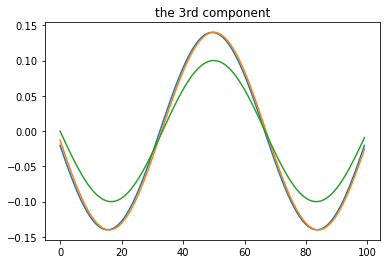

In [25]:
plt.plot(range(100), emp_eig_vec[:,2])
plt.plot(range(100), KL_eig_func1[1])
plt.plot(range(100), fourier_eig_func[2])
plt.title("the 3rd component")
plt.show()

The shapes of the third eigenfunctions are similar. Still, the amplitude of the Fourier basis is smaller, though.
Let me stop here. (Showing all 100 bases may make you bored!)